## Sentiment Analysis

In [5]:
# importing libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [7]:
df = pd.read_csv(r"C:\BritishAirways_DataScience\Data\Data_Cleaning.csv", index_col=0)

In [8]:
df

,Review,Date,Country,Rating,Verified,Cleaned_Review
0,✅ Trip Verified | Although transferring to thi...,15 May 2025,United States,5/10 rating,✅ Trip Verified,although transferring to this flight through h...
1,✅ Trip Verified | We are extremely grateful ...,8 May 2025,Switzerland,8/10 rating,✅ Trip Verified,we are extremely grateful to the crew of fligh...
2,✅ Trip Verified | I had an appalling experie...,29 April 2025,South Africa,10/10 rating,✅ Trip Verified,i had an appalling experience with british air...
3,"Not Verified | Good points, the cabin crew, t...",22 April 2025,United Kingdom,3/10 rating,❌ Not Verified,good points the cabin crew they were helpful p...
4,"Not Verified | It was a decent flight, reason...",22 April 2025,United Kingdom,6/10 rating,❌ Not Verified,it was a decent flight reasonable comfortable ...
...,...,...,...,...,...,...
3495,IAH-LHR B747 which was old but sat upstairs an...,4 December 2014,United States,10/10 rating,❌ Not Verified,iahlhr b747 which was old but sat upstairs and...
3496,YVR-LHR-AMS. An uneventful journey with BA but...,4 December 2014,Canada,8/10 rating,❌ Not Verified,yvrlhrams an uneventful journey with ba but th...
3497,Have just completed four flights with British ...,4 December 2014,South Africa,5/10 rating,❌ Not Verified,have just completed four flights with british ...
3498,British Airways for some reason was incapable ...,4 December 2014,United States,9/10 rating,❌ Not Verified,british airways for some reason was incapable ...


                                      Cleaned_Review  polarity sentiment
0  although transferring to this flight through h...  0.297500  Positive
1  we are extremely grateful to the crew of fligh...  0.058750  Positive
2  i had an appalling experience with british air... -0.056573  Negative
3  good points the cabin crew they were helpful p...  0.048286   Neutral
4  it was a decent flight reasonable comfortable ...  0.143864  Positive


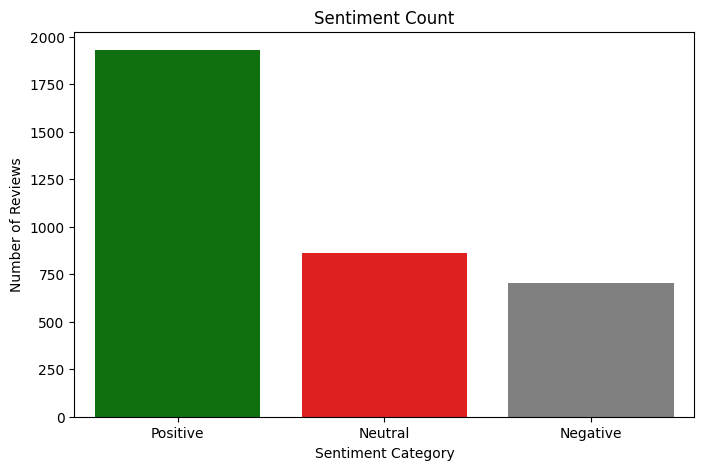

In [9]:
# bar chart for Sentiment count 
df['polarity'] = df['Cleaned_Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

def sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(sentiment_category)

print(df[['Cleaned_Review', 'polarity', 'sentiment']].head())

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', hue='sentiment', order=['Positive', 'Neutral', 'Negative'], palette=['green', 'grey', 'red'], legend=False)
plt.title('Sentiment Count')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

In [19]:
# sentiment analysis score
df['Sentiment_Score'] = df['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

df[['Cleaned_Review', 'Sentiment_Score']].head(10)

,Cleaned_Review,Sentiment_Score
0,although transferring to this flight through h...,0.297500
1,we are extremely grateful to the crew of fligh...,0.058750
2,i had an appalling experience with british air...,-0.056573
3,good points the cabin crew they were helpful p...,0.048286
4,it was a decent flight reasonable comfortable ...,0.143864
5,i really like flying british airways particula...,0.248872
6,could not book online the night before because...,-0.151111
7,having had some rough experiences with ba in r...,0.089815
8,this comfortable flight was ba at its best exc...,0.341892
9,punta cana terminal b check in was straightfor...,0.208722


count    3499.000000
mean        0.080616
std         0.178210
min        -0.766667
25%        -0.027778
50%         0.071296
75%         0.187099
max         0.715000
Name: Sentiment_Score, dtype: float64
Country
Chile         0.411111
Jordan        0.340000
Lebanon       0.322240
Slovakia      0.311102
Senegal       0.287500
Luxembourg    0.284563
Vietnam       0.256140
Israel        0.256131
Ukraine       0.207411
Poland        0.204315
Name: Sentiment_Score, dtype: float64


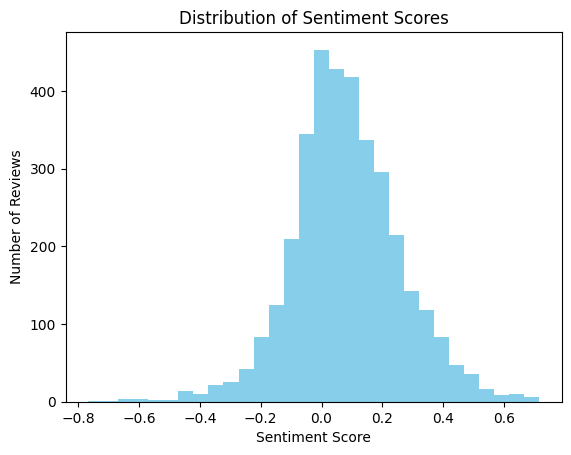

In [23]:
# distribution of sentiment scores
print(df['Sentiment_Score'].describe())

country_sentiment = df.groupby('Country')['Sentiment_Score'].mean().sort_values(ascending=False)
print(country_sentiment.head(10))

plt.hist(df['Sentiment_Score'], bins=30, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.show()


In [21]:
df

,Review,Date,Country,Rating,Verified,Cleaned_Review,polarity,sentiment,Sentiment_Score
0,✅ Trip Verified | Although transferring to thi...,15 May 2025,United States,5/10 rating,✅ Trip Verified,although transferring to this flight through h...,0.297500,Positive,0.297500
1,✅ Trip Verified | We are extremely grateful ...,8 May 2025,Switzerland,8/10 rating,✅ Trip Verified,we are extremely grateful to the crew of fligh...,0.058750,Positive,0.058750
2,✅ Trip Verified | I had an appalling experie...,29 April 2025,South Africa,10/10 rating,✅ Trip Verified,i had an appalling experience with british air...,-0.056573,Negative,-0.056573
3,"Not Verified | Good points, the cabin crew, t...",22 April 2025,United Kingdom,3/10 rating,❌ Not Verified,good points the cabin crew they were helpful p...,0.048286,Neutral,0.048286
4,"Not Verified | It was a decent flight, reason...",22 April 2025,United Kingdom,6/10 rating,❌ Not Verified,it was a decent flight reasonable comfortable ...,0.143864,Positive,0.143864
...,...,...,...,...,...,...,...,...,...
3495,IAH-LHR B747 which was old but sat upstairs an...,4 December 2014,United States,10/10 rating,❌ Not Verified,iahlhr b747 which was old but sat upstairs and...,-0.055112,Negative,-0.055112
3496,YVR-LHR-AMS. An uneventful journey with BA but...,4 December 2014,Canada,8/10 rating,❌ Not Verified,yvrlhrams an uneventful journey with ba but th...,0.232723,Positive,0.232723
3497,Have just completed four flights with British ...,4 December 2014,South Africa,5/10 rating,❌ Not Verified,have just completed four flights with british ...,0.206294,Positive,0.206294
3498,British Airways for some reason was incapable ...,4 December 2014,United States,9/10 rating,❌ Not Verified,british airways for some reason was incapable ...,0.049747,Neutral,0.049747


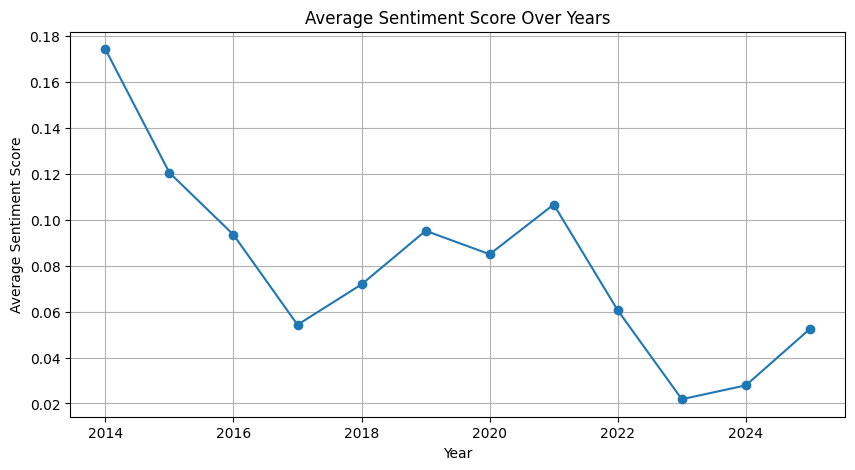

In [22]:
# average sentiment score over years
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year

sentiment_yearly = df.groupby('Year')['Sentiment_Score'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(sentiment_yearly['Year'], sentiment_yearly['Sentiment_Score'], marker='o')
plt.title('Average Sentiment Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

In [24]:
df

,Review,Date,Country,Rating,Verified,Cleaned_Review,polarity,sentiment,Sentiment_Score,Year
0,✅ Trip Verified | Although transferring to thi...,2025-05-15,United States,5/10 rating,✅ Trip Verified,although transferring to this flight through h...,0.297500,Positive,0.297500,2025
1,✅ Trip Verified | We are extremely grateful ...,2025-05-08,Switzerland,8/10 rating,✅ Trip Verified,we are extremely grateful to the crew of fligh...,0.058750,Positive,0.058750,2025
2,✅ Trip Verified | I had an appalling experie...,2025-04-29,South Africa,10/10 rating,✅ Trip Verified,i had an appalling experience with british air...,-0.056573,Negative,-0.056573,2025
3,"Not Verified | Good points, the cabin crew, t...",2025-04-22,United Kingdom,3/10 rating,❌ Not Verified,good points the cabin crew they were helpful p...,0.048286,Neutral,0.048286,2025
4,"Not Verified | It was a decent flight, reason...",2025-04-22,United Kingdom,6/10 rating,❌ Not Verified,it was a decent flight reasonable comfortable ...,0.143864,Positive,0.143864,2025
...,...,...,...,...,...,...,...,...,...,...
3495,IAH-LHR B747 which was old but sat upstairs an...,2014-12-04,United States,10/10 rating,❌ Not Verified,iahlhr b747 which was old but sat upstairs and...,-0.055112,Negative,-0.055112,2014
3496,YVR-LHR-AMS. An uneventful journey with BA but...,2014-12-04,Canada,8/10 rating,❌ Not Verified,yvrlhrams an uneventful journey with ba but th...,0.232723,Positive,0.232723,2014
3497,Have just completed four flights with British ...,2014-12-04,South Africa,5/10 rating,❌ Not Verified,have just completed four flights with british ...,0.206294,Positive,0.206294,2014
3498,British Airways for some reason was incapable ...,2014-12-04,United States,9/10 rating,❌ Not Verified,british airways for some reason was incapable ...,0.049747,Neutral,0.049747,2014


In [25]:
df.to_csv('Data/Sentiment_Analysis.csv', index=False, encoding='utf-8-sig')